# Intro

Ok. As we're warming up to the project, today's exercises is going to ask you to create our own micro-project. It'll be highly structured and hosted on the web-page you created last time. Before we can start on that there's a bit of reading first. 

Thus, today's lecture has two parts:

* More reading on Narrative Data Visualization.
* Creating a micro project based on our work in the class so far.

So let's get started 😀

## Part 1: More on narrative data viz

*Reading*. More on Narrative Visualization. Edward Segel and Jeffrey Heer. [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf), section 4-6.

> *Exercise*: Questions to the text
> 
> * What's the point of Figure 7?
> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).
> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?

## Part 2: A short data story / micro-project

> *Exercise*: Create a short data-story based on the work we've done in class so far. (This exercise is a kind of "micro version" of what we'll be doing in the final project). Follow the directions in the bulleted list below when you create your data-story.

* **Find your own story to tell in the work on analyzing the SF Crime Data that we've done so far** (Week 1 - Week 6). The idea is to choose an insight about crime in SF (perhaps how something changed over the years) and communicate that insight to a general audience reader.
* The web-page should be hosted on your GitHub Pages site (Week 7).
* The format must be the classic *Magazine Genre* presented on a single web-page (see the Segel \& Heer paper for details.
* The story should have a brief introduction to the dataset so new readers from outside the class can understand what's going on.
* Your story should include three visualizations. Not more than three, not less than three (but multi-panel figures are OK). The figures should be one of each of the following types
  - One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4).
  - One map (use techniques from Week 3 and 4)
  - One interactive visualization in Bokeh (Week 6)
* **At a minimum, the Bokeh visualization should contain different data** than the exercise we did for Week 6 (it's a plus if it's a new type of viz altogether). 
* The two other visualization may be repetitions of figures created during the previous lectures, or they may be new.
* Make the figures nice. Specifically:
  - Aim to make the figures visually consistent (color, fonts, etc)
  - Follow the recommendations from my video on nice figures (Week 2)
* In terms of the amount of text, I envision something like 500-1500 words (including figure captions).
* It is a plus if you can back up some of your findings with external sources, such as news stories from the area, looking up which building is located at some set of `lat,lon` coordinates, or similar. (So when you see something happening at some time/place in the data, see if you can understand it more deeply by investigating outside the dataset.)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df_before_2018 = pd.read_csv('../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_before_2018['Date'] = pd.to_datetime(df_before_2018['Date'])
df_before_2018['Year'] = df_before_2018['Date'].dt.year
df_before_2018 = df_before_2018.loc[df_before_2018['Year'] != 2018]

In [ ]:
df_before_2018.columns.tolist()

In [5]:
df_after_2018 = pd.read_csv('../../Police_Department_Incident_Reports__2018_to_Present.csv')

In [ ]:
df_after_2018.columns.tolist()

In [58]:
category1 = df_before_2018['Category'].unique().tolist()
category2 = df_after_2018['Incident Category'].unique().tolist()

category1

['ROBBERY',
 'VEHICLE THEFT',
 'ARSON',
 'ASSAULT',
 'TRESPASS',
 'BURGLARY',
 'LARCENY/THEFT',
 'WARRANTS',
 'OTHER OFFENSES',
 'DRUG/NARCOTIC',
 'SUSPICIOUS OCC',
 'LIQUOR LAWS',
 'VANDALISM',
 'WEAPON LAWS',
 'NON-CRIMINAL',
 'MISSING PERSON',
 'FRAUD',
 'SEX OFFENSES, FORCIBLE',
 'SECONDARY CODES',
 'DISORDERLY CONDUCT',
 'RECOVERED VEHICLE',
 'KIDNAPPING',
 'FORGERY/COUNTERFEITING',
 'PROSTITUTION',
 'DRUNKENNESS',
 'BAD CHECKS',
 'DRIVING UNDER THE INFLUENCE',
 'LOITERING',
 'STOLEN PROPERTY',
 'SUICIDE',
 'BRIBERY',
 'EXTORTION',
 'EMBEZZLEMENT',
 'GAMBLING',
 'PORNOGRAPHY/OBSCENE MAT',
 'SEX OFFENSES, NON FORCIBLE',
 'TREA']

In [ ]:
category2 = [ele.upper() if isinstance(ele, str) else ele for ele in category2]
category2

In [47]:
c = list(set(category1).intersection(set(category2)))
c

['ROBBERY',
 'GAMBLING',
 'PROSTITUTION',
 'STOLEN PROPERTY',
 'VANDALISM',
 'LIQUOR LAWS',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'DISORDERLY CONDUCT',
 'EMBEZZLEMENT',
 'MISSING PERSON',
 'ARSON',
 'SUSPICIOUS OCC',
 'RECOVERED VEHICLE',
 'FRAUD',
 'BURGLARY',
 'SUICIDE',
 'ASSAULT']

In [ ]:
df_after_2018.loc[df_after_2018['Incident Category']=='Robbery']

In [ ]:
df_before_2018.loc[df_before_2018['Category'] == 'ROBBERY']

## Timeseries: bar chart + some calendar plots

In [74]:
focuscrimes = [ 'ASSAULT', 'ROBBERY']

In [76]:
hour_of_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hour_of_day)):
    if i+1 == len(hour_of_day):
        start = hour_of_day[i]
        end = hour_of_day[0]
        hourly_slots[start] = str(start) + "-" + str(end)
    else:
        start = hour_of_day[i]
        end = hour_of_day[i+1]
        hourly_slots[start] = str(start) + "-" + str(end)

In [77]:
df_before_2018['Hour'] = pd.DatetimeIndex(df_before_2018['Time']).hour
df_before_2018["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_before_2018['Hour'])]

In [78]:
hourly_pattern = df_before_2018.groupby(by=["time_period", "Category"]).size().reset_index(name="Count")

hourly_pattern = hourly_pattern.loc[hourly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

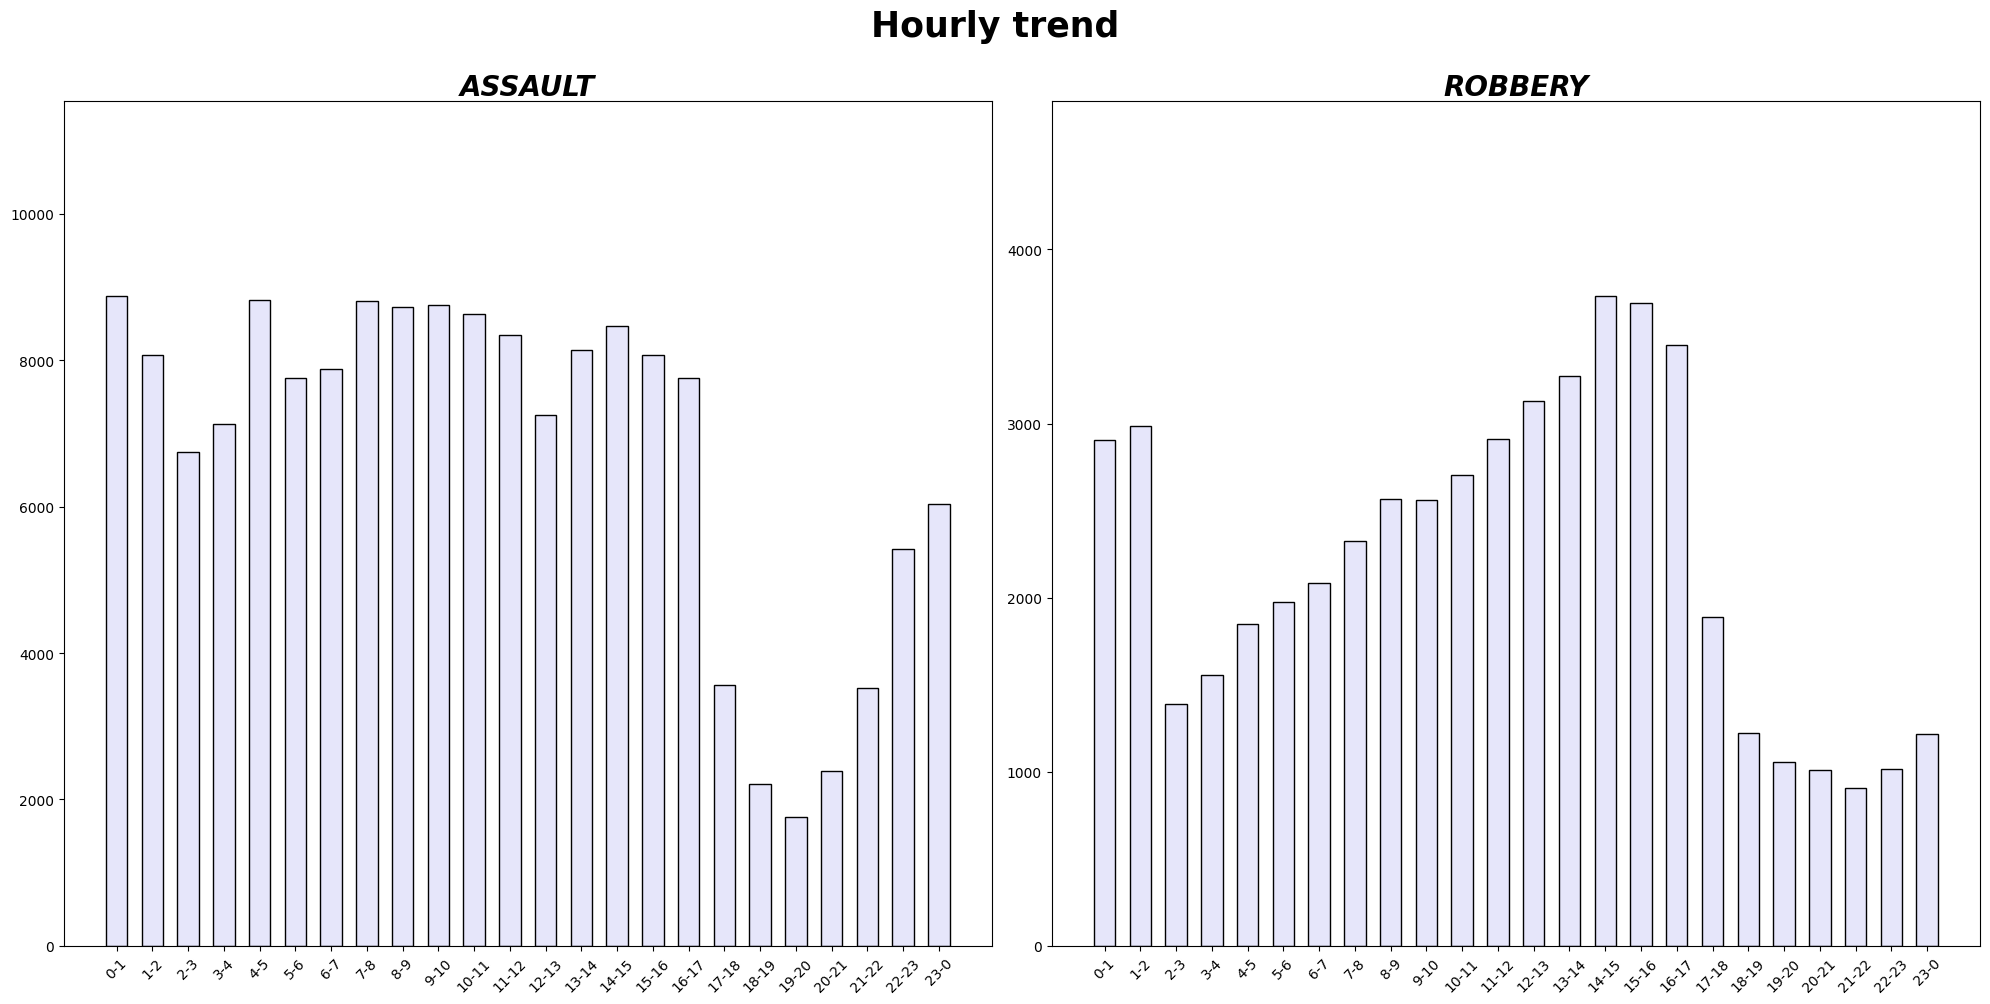

In [79]:
plt.figure(figsize=(20,10))
plt.suptitle("Hourly trend" ,fontsize=25, y=1.0, fontweight='bold', color='black')
for i in range(len(focuscrimes)):
    temp = hourly_pattern.loc[hourly_pattern['Category'] == focuscrimes[i]].reset_index(drop=True)
    x = temp["time_period"]
    y = temp["Count"]

    plt.subplot(int(len(focuscrimes)/2),2,i+1)
    plt.title(focuscrimes[i], pad=-14, fontsize = 20, fontweight='bold', fontstyle="italic")
    plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
    plt.xticks(x, hourly_slots.values(), rotation=45)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))


Yearly pattern

In [80]:
yearly_pattern = df_before_2018.groupby(by=["Year", "Category"]).size().reset_index(name="Count")

yearly_pattern = yearly_pattern.loc[yearly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

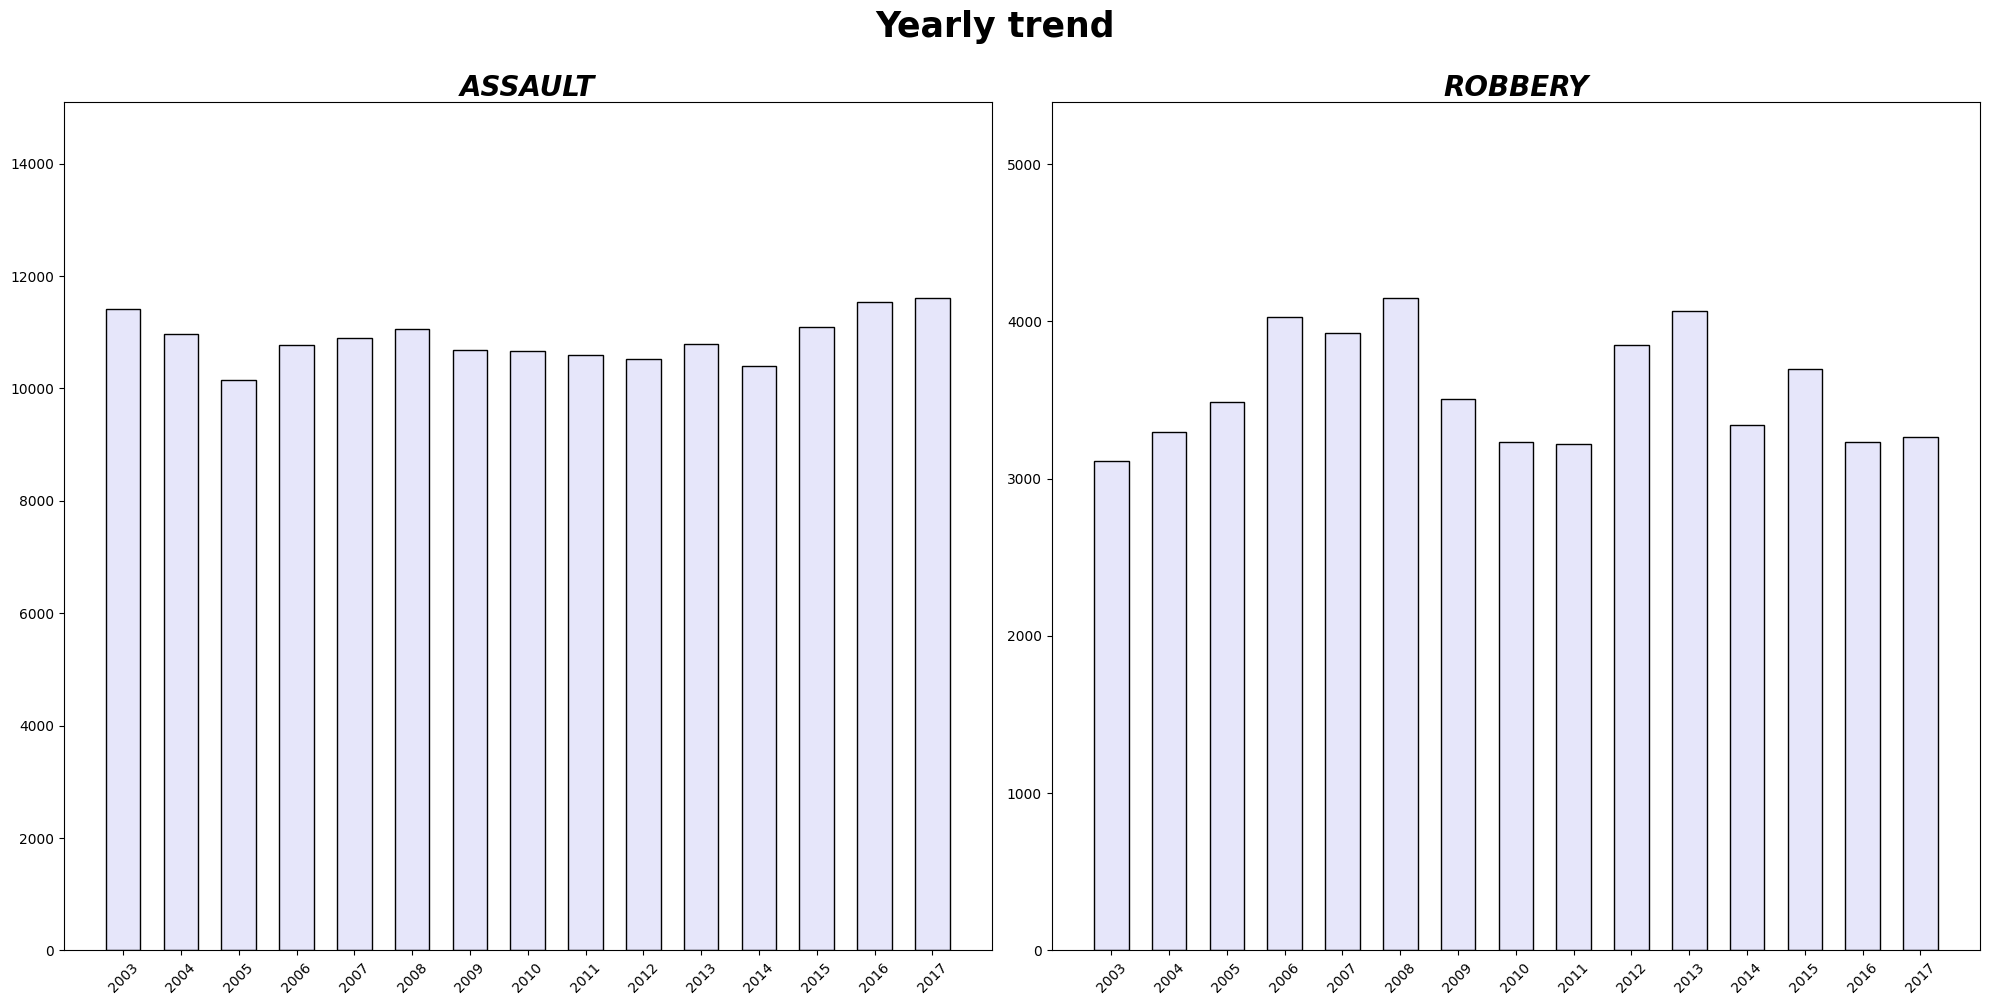

In [81]:
x_values = yearly_pattern['Year'].unique().tolist()

plt.figure(figsize=(20,10))
plt.suptitle("Yearly trend" ,fontsize=25, y=1.0, fontweight='bold', color='black')
for i in range(len(focuscrimes)):
    temp = yearly_pattern.loc[yearly_pattern['Category'] == focuscrimes[i]].reset_index(drop=True)
    x = temp["Year"]
    y = temp["Count"]

    plt.subplot(int(len(focuscrimes)/2),2,i+1)
    plt.title(focuscrimes[i], pad=-14, fontsize = 20, fontweight='bold', fontstyle="italic")
    plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
    plt.xticks(x, x_values, rotation=45)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

Calendar plot

In [ ]:
df_robbery = df_before_2018.loc[df_before_2018['Category']=="ROBBERY"]
df_robbery = df_robbery[df_robbery["Year"] == 2008]

In [87]:
robbery_count_by_day = (
    df_robbery.groupby(df_robbery["Date"])["IncidntNum"]
    .nunique()
    .rename("Count")
)

robbery_count_by_day.index = pd.to_datetime(robbery_count_by_day.index)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


Text(0.5, -4.240723270440254, 'Week of year')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


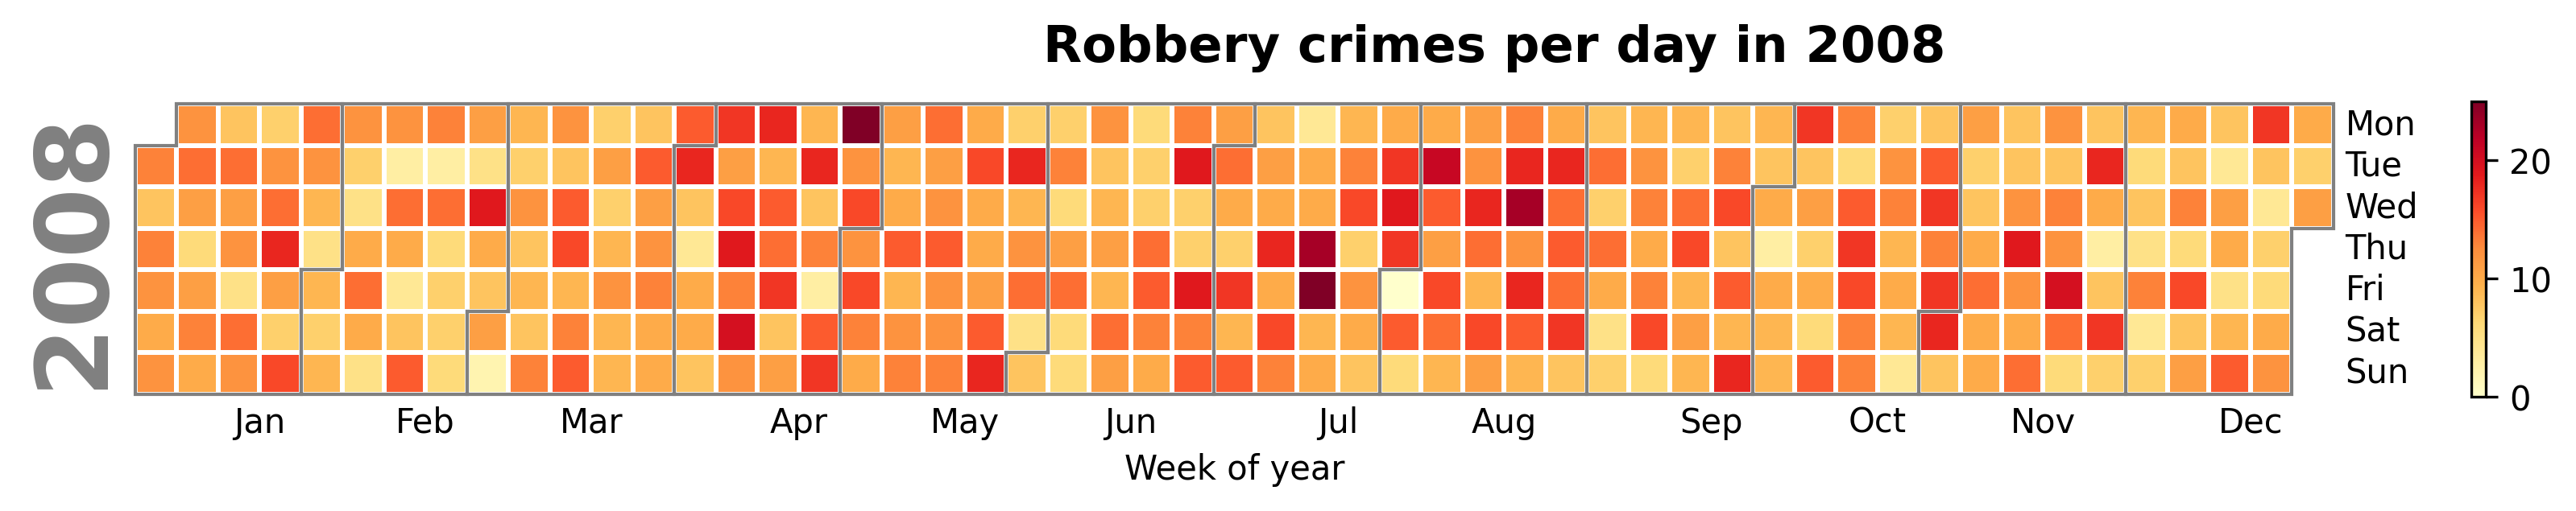

In [97]:
import calplot

fig, axs = calplot.calplot(robbery_count_by_day, cmap="YlOrRd")
fig.set_dpi(300)

fig.suptitle("Robbery crimes per day in 2008", fontsize=15, y=1.1, fontweight='bold', color='black')
axs[0].set_xlabel("Week of year", fontsize=10)